In [79]:
import pandas as pd
from chemtbd.io import Agilent

In [80]:
agi = Agilent.from_root('data/test3')

In [82]:
tic = agi['FA03.D'].results.tic
lib = agi['FA03.D'].results.lib
fid = agi['FA03.D'].results.fid

In [86]:
def find_match(x, Y):
    ''' find index of argmin lambda(x,Y)
    '''
    score = lambda y: (x - y)**2
    return Y.apply(score).idxmin()

def rt_match(lib_row, rt):
    ''' find closest rt
    '''
    x, i = lib_row.rt, lib_row.name
    return find_match(x, rt[i:])

In [96]:
xi = lib.apply(rt_match, rt=tic.rt.sort_values(), axis=1)
lib['tic_area'] = tic.area[xi].values
lib['tic_rt'] = tic.rt[xi].values

xi = lib.apply(rt_match, rt=fid.rt.sort_values(), axis=1)
lib['fid_area'] = fid.area[xi].values
lib['fid_rt'] = fid.rt[xi].values

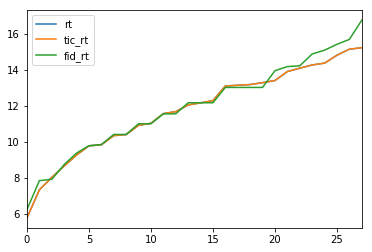

In [99]:
%matplotlib inline
lib[['rt', 'tic_rt', 'fid_rt']].plot()